# MATH&ML-13. Временные ряды. Часть II

## 1. Введение

✍ В предыдущем модуле мы уже начали знакомиться со специальными инструментами для работы с временными рядами. Теперь нас ждёт тяжёлая артиллерия: мы будем углублять знания и изучать более сложные и мощные модели.

В этом модуле вы:

- узнаете об основных статистических моделях: MA, ARMA, ARIMA, SARIMAX;

- изучите интерполяцию и сэмплирование временных рядов;

- познакомитесь с особенностями валидации временного ряда;

- научитесь строить и настраивать финансовые модели.

# 2. Проект модуля

✍ Каждому теоретическому юниту, где мы будем знакомиться с новыми инструментами для анализа временных рядов, будет сопутствовать соответствующий практический юнит. Практика предполагает поступательное решение двух задач: первая решается по скринкастам совместно с автором модуля, вторую вы решаете полностью самостоятельно.

**Вторая задача** — и есть ваш мини-проект этого модуля. Все задания для проекта необходимо выполнять в одном Jupyter-ноутбуке. Полученный в итоге ноутбук необходимо будет отправить на проверку ментору с помощью специальной формы в конце модуля.

Обратите внимание: от вас ожидается не только выполнение заданий в виде кода, но и комментарии и выводы по ним.

Будьте внимательны, чтобы не упустить ничего важного. Желаем вам удачи!

**Задача для самостоятельного проекта**

Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.

Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили показатели ВВП Ганы за 62 года. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

# 3. Статистические модели прогнозирования

✍ Разные статистические модели прогнозирования тесно связаны друг с другом: в целях улучшения результата более простые подходы расширялись и становились основой для более сложных. В итоге в статистике появилось несколько методов прогнозирования, отличающихся между собой деталями, которые мы рассмотрим в этом юните.

### СКОЛЬЗЯЩЕЕ СРЕДНЕЕ

В предыдущем модуле мы уже знакомились с экспоненциальным сглаживанием и получением с его помощью прогноза. Помимо простого экспоненциального сглаживания, есть также простое сглаживание, или **скользящее среднее**.

Для получения элементарного случая скользящего среднего проще всего взять среднее арифметическое двух последних наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда:

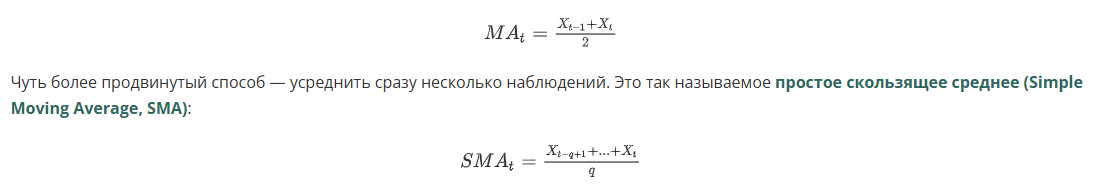

Таким образом, в скользящем среднем мы суммируем несколько последовательных точек временного ряда и делим эту сумму на количество самих точек, то есть считаем математическое усреднение за определённый период.

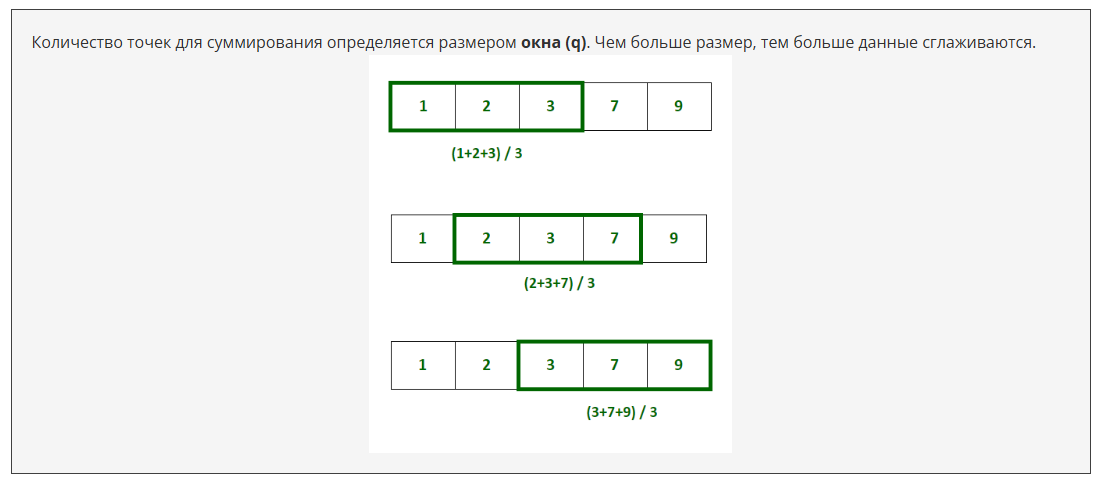

Для сглаживания мы будем использовать встроенный метод pandas.Series.rolling() — он принимает на вход параметр window и ожидает после себя агрегирующую функцию для сглаживания (обычно используется среднее). Из преимуществ этого метода можно отметить простоту реализации и интерпретации, из недостатков — чувствительность.

Посмотрим на некоторый временной ряд и результаты применения сглаживания к нему:

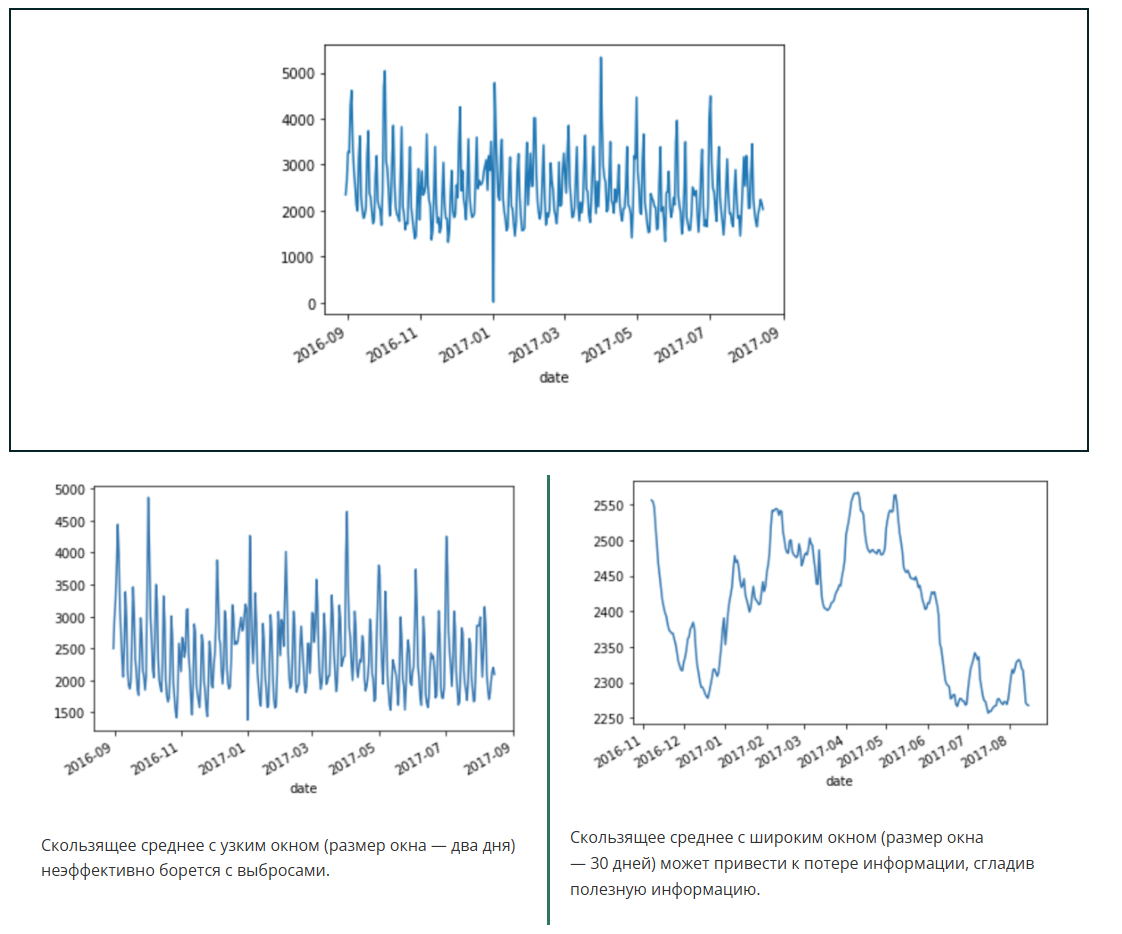

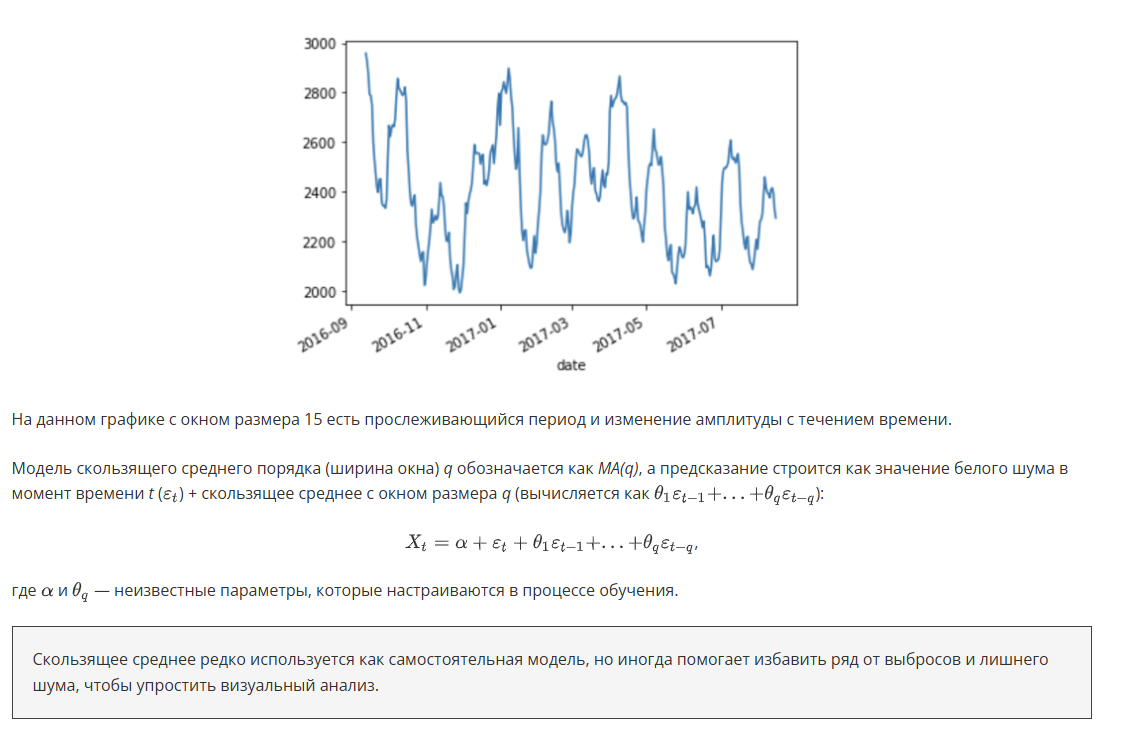

### ARMA и ARIMA

Что получится, если объединить некоторые из изученных нами методов? Уже есть предположения, что такое ARMA?

Если вы внимательно следили за ходом событий, то смогли догадаться, что **ARMA** — это авторегрессионное скользящее среднее, или модель авторегрессии-скользящего среднего. В ней "p" **авторегрессионных слагаемых** и "q" **слагаемых скользящего среднего шумовой компоненты**:

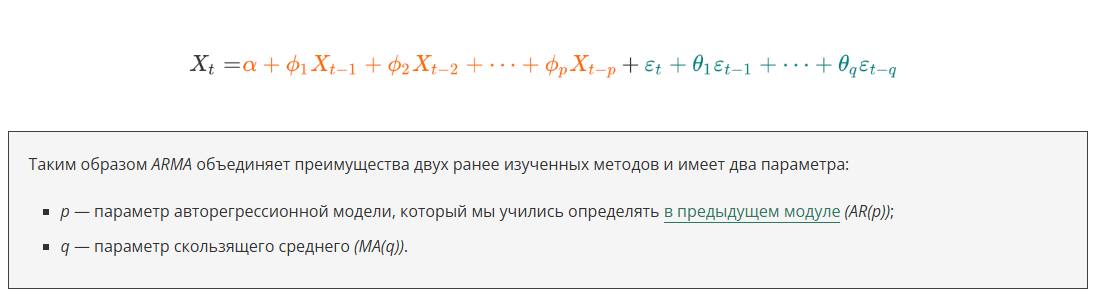

Параметр p мы определяли по графику частичной автокорреляции. Параметр q для скользящего среднего определяют так же, но по коррелограмме (графику автокорреляции).

«Было бы здорово применить всё это и для временных рядов, которые не являются стационарными», — подумали Дж. Бокс и Г. Дженкинс и расширили модель ARMA до ARIMA.

**ARIMA** расшифровывается как Autoregressive Integrated Moving Average и включает в себя ещё один параметр (d), который означает, что дифференцирование временного ряда порядка d приводит ряд к стационарности и будет подчиняться модели ARMA.

d — это тот самый порядок дифференцирования из предыдущего модуля, который приводил нестационарный ряд к стационарности. Это значит, что даже если наш ряд нестационарный, мы можем сделать его стационарным путём взятия разностей. Запомнив получившееся количество дифференцирований, можно смело применять к нему ARIMA.

И ARMA, и ARIMA реализованы на Python в классе ARIMA из statsmodels. Данному классу необходимо передать в качестве параметров временной ряд и порядок order (ARIMA(dta, order=(2, 0, 0))). Для параметра order нужно указать p, d и q (именно в таком порядке), причём для получения ARMA необходимо указать d=0.

Резюмируем:

- Если ряд стационарный, используем ARMA.
- Если ряд нестационарный (имеет тренд), с помощью дифференцирования определяем порядок d и используем ARIMA.

Теперь мы можем проверять временные ряды из задач на стационарность и вне зависимости от результата применять к ним одну из статистических моделей.

### SARIMA

Модель ARIMA отлично учитывает и тренд (благодаря скользящему среднему), и зависимость от предыдущих значений (благодаря авторегрессии), но в ней не хватает учёта сезонности. В таком случае можно добавить к ARIMA учёт сезонности, и тогда мы получим следующую модель — сезонную ARIMA, или **SARIMA (Seasonal ARIMA)**.

Эта модель очень похожа на ARIMA, за исключением того, что в ней есть дополнительный набор компонентов авторегрессии и скользящего среднего.

SARIMA позволяет различать данные по сезонной частоте, а также по их несезонным отличиям. Нахождение лучших для модели параметров можно упростить с помощью средств автоматического поиска, таких как auto_arima из pmdarima.

### SARIMAX и ARIMAX

Вы уже могли заметить, что изученные нами статистические модели совершают предсказания, основываясь только на данных самого временного ряда. Но что если месяц или день недели тоже имеет значение? Или, например, на курс рубля, помимо даты и предыдущих значений, также влияют курсы других валют?

Последней статистической моделью, с которой мы познакомимся, будет **SARIMAX**. Её отличие от предыдущей версии заключается в том, что, помимо данных временного ряда, она учитывает экзогенные переменные. Таким образом мы сможем учитывать не только зависимости внутри данных, но и внешние факторы.

Для запуска моделей SARIMA и SARIMAX на Python нужно воспользоваться классом SARIMAX. Если вы хотите использовать SARIMA, необходимо задать два обязательных параметра — order и seasonal_order.

order — это порядок для модели (ARIMA(p, d, q)). В seasonal_order необходимо передать ещё четыре параметра:

- P — сезонный авторегрессионный порядок;
- D — порядок дифференцирования сезонного ряда;
- Q — порядок сезонной скользящей средней;
- m — размер сезонного периода.

Если размер сезонного периода m можно определить по сезонной компоненте (мы уже раскладывали ряд на компоненты ранее — seasonal_decompose), то остальные параметры удобнее определять автоперебором (мы применим этот способ на практике в следующем юните).

Для учёта экзогенных переменных необходимо передать в класс SARIMAX параметр exog=x. В x должны находиться другие временные ряды, например курс доллара (x), который может влиять на курс рубля (y), или пометка, является ли каждая из дат праздничным днём.

Хороший пример реализации SARIMAХ приведён в официальной документации.

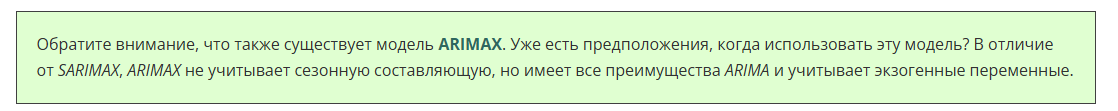

### Как сравнивать эти модели?

Одним из распространённых способов является сравнение качества моделей по критерию Акаике (AIC). Этот информационный критерий вознаграждает модель за качество приближения обученного временного ряда к фактическому, а также «штрафует» её за использование излишнего количества параметров. Принято считать, что модель с наименьшим значением критерия AIC является наилучшей.

Для оценки модели критерием AIC необязательно пользоваться дополнительными методами. Этот критерий, как и другая информация, отображается после обучения модели при вызове встроенного метода fit_model.summary().

### Как выбрать подходящую модель?

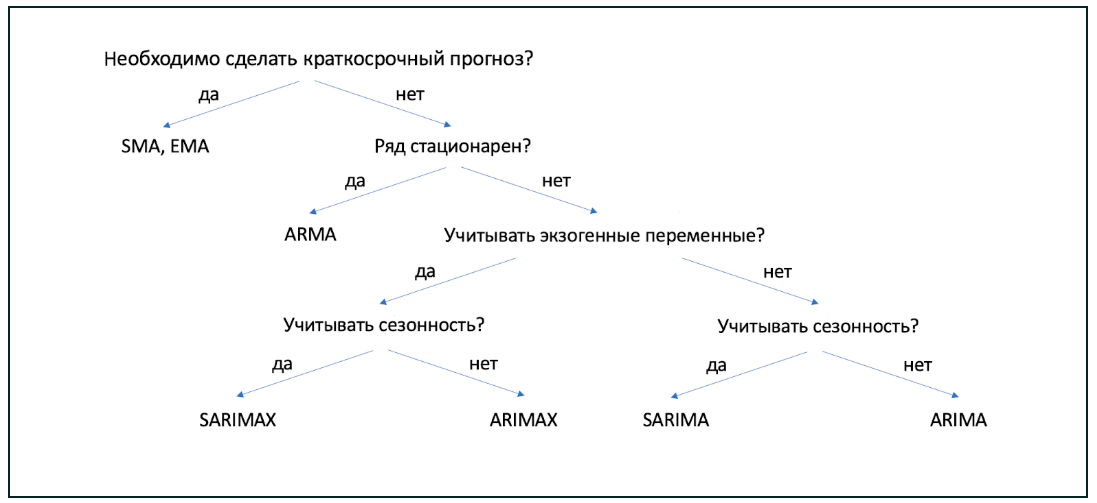

Итак, мы познакомились с самыми популярными статистическими подходами для анализа временных рядов — давайте перейдём к практике и посмотрим на эти инструменты в действии.

Дополнительно:

- Оценка качества модели информационными критериями продемонстрирована в этой статье. https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
- Ещё один пример с расчётом критерия для различных комбинаций параметров представлен здесь. https://www.8host.com/blog/prognozirovanie-vremennyx-ryadov-s-pomoshhyu-arima-v-python-3/

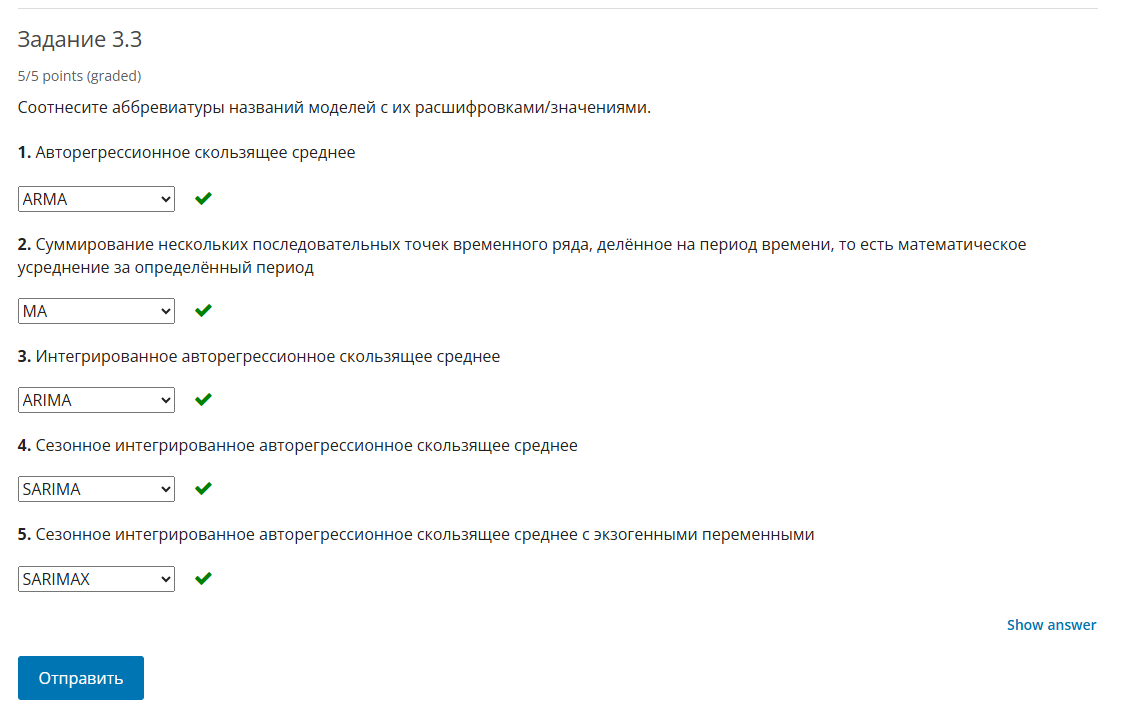

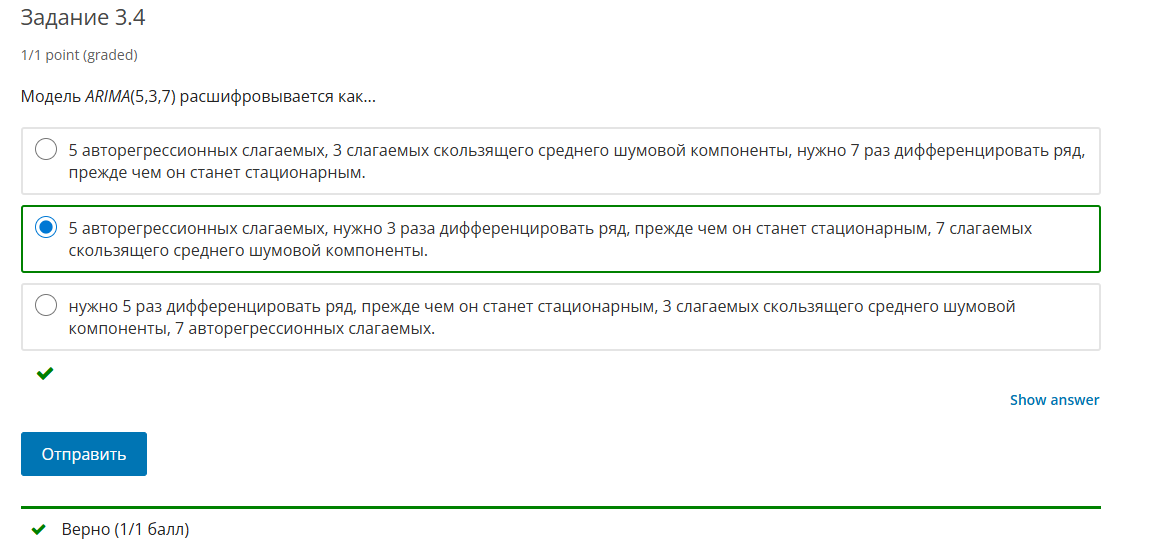

# 4. Статистические модели прогнозирования. Практика

✍ Предсказание финансовых индексов — актуальная задача, решением которой интересуются не только компании, но и индивидуальные инвесторы.

На протяжении этого модуля мы с вами будем совместно решать задачу предсказания значений фондового индекса S&P 500.

Мы будем работать со значениями этого индекса за несколько лет.

Посмотрите скринкаст ниже:

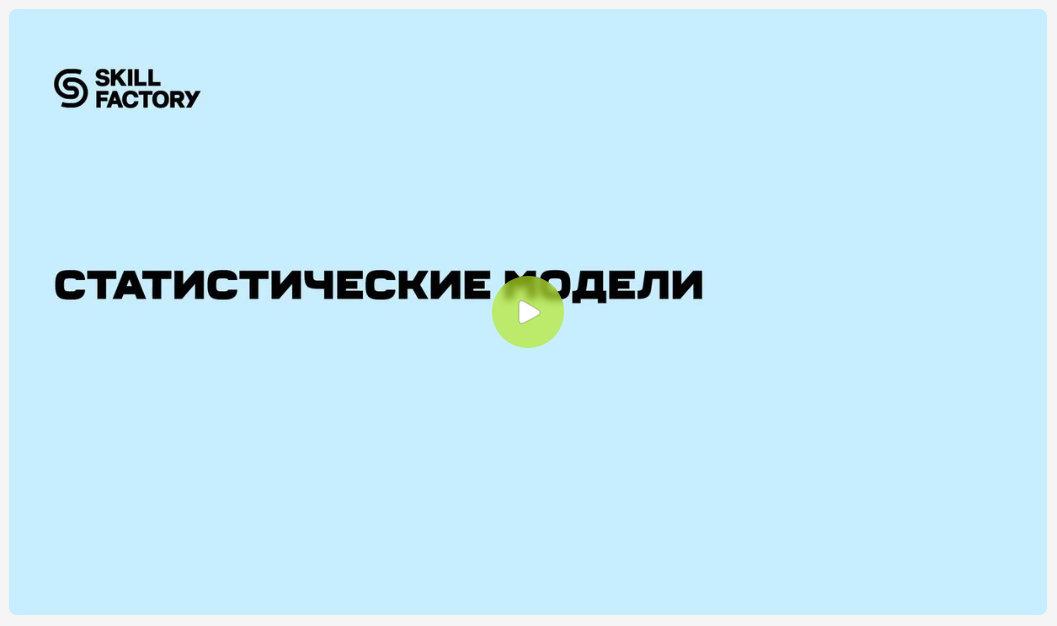

В скринкасте продемонстрирован расчёт доверительных интервалов. Подробнее о том, что это такое и как вычислять его математически, можно прочитать здесь. http://datascientist.one/confidence-interval/

Рекомендуем постараться понять, повторить и проанализировать ход решения задачи из всех скринкастов в практических юнитах этого модуля — это позволит вам быстрее освоить новые инструменты и обрести уверенность в их использовании.

### Задания для проекта

Итак, здесь вы начинаете работу над своим небольшим проектом. Напоминаем — работать нужно с данными по ВВП Ганы. Выполняйте все задания проекта в одном Jupyter-ноутбуке.

1. Прочитайте исходный файл с данными. Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

2. Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.
Постройте график скользящего среднего, проанализируйте результат. Для построения MA используйте метод rolling(), который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

Пример: train_df.spx.rolling(window=2).mean().

Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.


3. С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA.

Примечание. Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет вашим параметром d для модели ARIMA.

Параметры p и q выберите по коррелограммам ACF и PACF.

Примечание. Помните, что параметры p и q для ARMA/ARIMA определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC (или подберите наилучшие параметры с помощью пакета pmdarima, как в скринкасте).

4. Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).
5. Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.
6. Сделайте выводы по полученным результатам.

# 5. Интерполяция и сэмплирование

✍ Иногда можно столкнуться с отсутствием данных, например когда вы обрабатываете показания счётчика потребления горячей и холодной воды, а он по какой-то причине не работал несколько дней. Пропуски могут быть заполнены значениями NaN или нулями.

Взгляните на график ниже: за два дня (конец декабря и начало января) данные отсутствуют (они равны нулю) — из-за этого образуются спады до 0 в районе января.

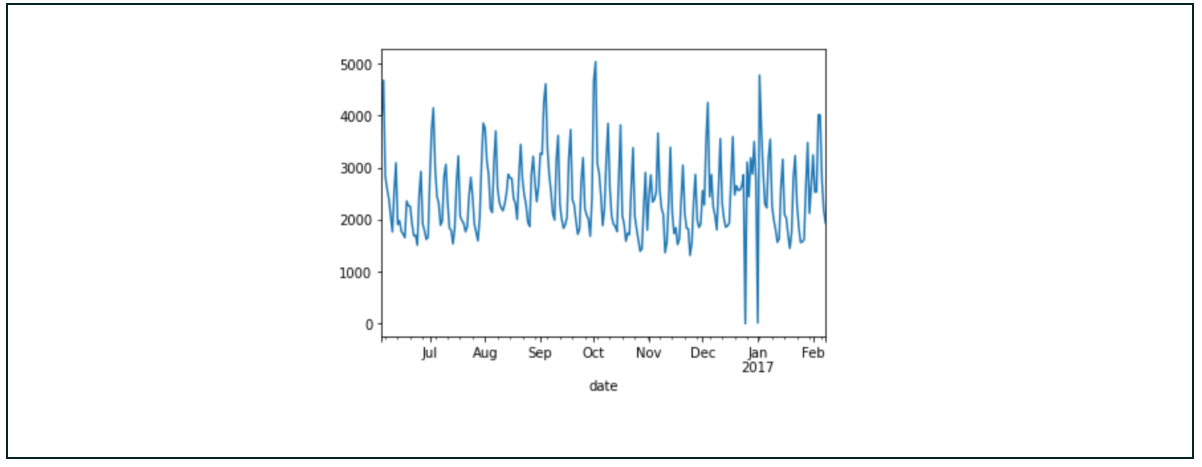

Хотим ли мы, чтобы модель, которая должна предсказывать объём потребления воды, учитывала эти значения, равные нулю? Очевидно, нет. Значит, нам нужно каким-то образом заполнить пропуски, причём заполнение нулями нам не подходит, а заполнение средним — тоже не самая эффективная идея.

А что, если у нас есть показания счётчика по дням, а заказчик хочет получить прогноз по часам? Тогда нам снова нужно как-то заполнить возникающие пропуски для часов.

Знакомьтесь — перед нами проблемы upsampling и downsampling на временных рядах.

**Upsampling** — это увеличение частоты выборки (повышение частоты дискретизации), например с минут до секунд. Также upsampling применяют для заполнения пропусков неизвестных значений. Для этой цели мы будем использовать интерполяцию.

**Downsampling** — это уменьшение частоты выборки, например с дней до месяцев.

## Downsampling

Начнём с простого — с downsampling.

По своей сути, downsampling — это перегруппировка. Мы можем сгруппировать значения, полученные по дням, в значения, полученные за месяц, путём использования метода groupby(). Однако существует ещё один встроенный в DataFrame метод с чуть более широким функционалом — resample(). Этот метод позволяет делать нестандартные группировки, такие как «за три дня» или «за каждые шесть секунд», то есть вы можете выбрать свой интервал группировки и получить результат, написав одну строку кода. Вызывать метод resample необходимо у датафрейма, в качестве индекса у которого используются даты в формате datetime. Например, если наш временной ряд с показаниями счетчика по потреблению воды изначально сгруппирован по дням, применив к нему resample, можно получить:



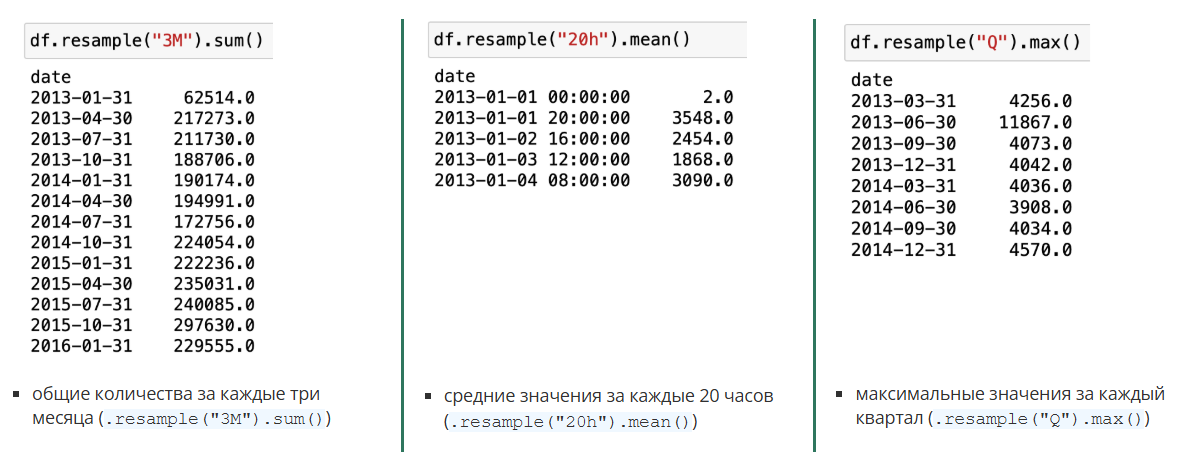